In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread(R"C:\Users\shash\OneDrive\Documents\Train_DataSet\Closed_Eyes\s0001_00190_0_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)

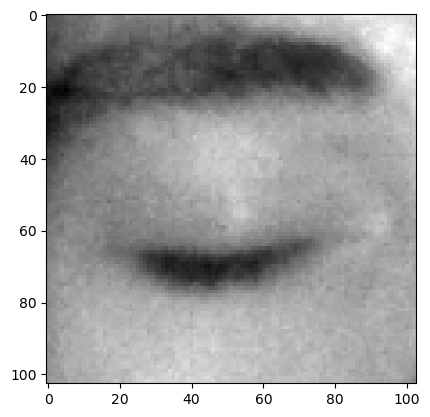

In [4]:
plt.imshow(img_array,cmap="gray")

In [5]:
img_array.shape

(103, 103)

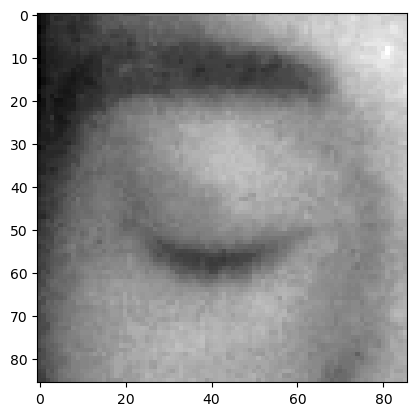

In [6]:
Datadirectory = r"C:\Users\shash\OneDrive\Documents\Train_DataSet"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

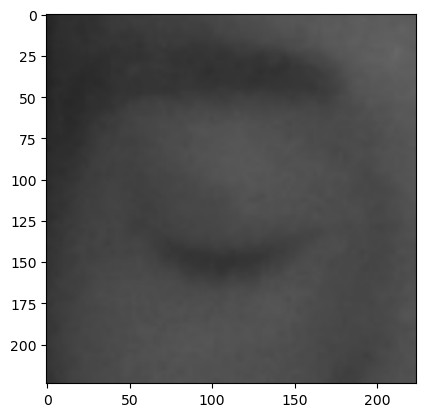

In [7]:
img_size= 224

new_array= cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

## reading all the images and converting them into an array for data and labels

In [8]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num =  Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

1629


In [11]:
import random

random.shuffle(training_Data)

In [12]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape

(1629, 224, 224, 3)

In [14]:
#normalize the data
X = X/255.0;

In [15]:
Y = np.array(y)

In [19]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

# Deep learning model for training - Training Learning

In [17]:
import tensorflow as  tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Transfer Learning

In [20]:
from keras.models import load_model
import keras
from keras import layers

In [21]:
 model.save(r"C:\Users\shash\OneDrive\Documents\Train_DataSet.h5")

In [22]:
model = load_model(r"C:\Users\shash\OneDrive\Documents\Train_DataSet.h5")

In [23]:
base_input = model.input

In [24]:
base_output = model.layers[-4].output

In [25]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)  ## one node(1/ 0)
final_output = layers.Activation('sigmoid')(final_output)

In [26]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [27]:
layerslayers

NameError: name 'layerslayers' is not defined

In [28]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Settings for binary classification(open / closed)

In [32]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [33]:
new_model.fit(X,Y,epochs=1,validation_split=0.1) ##training

46/46 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.9971 - loss: 0.0106 - val_accuracy: 0.6319 - val_loss: 23.7301


In [35]:
new_model.save(r"C:\Users\shash\OneDrive\Documents\Train_DataSet.h5")

In [36]:
new_model=tf.keras.models.load_model(r"C:\Users\shash\OneDrive\Documents\Train_DataSet.h5")

# checking the network for predictions

In [37]:
img_array = cv2.imread(r"C:\Users\shash\OneDrive\Documents\Train_DataSet\Open_Eyes\s0034_00616_0_0_1_0_0_02.png" , cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

In [38]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [39]:
X_input.shape

(1, 224, 224, 3)

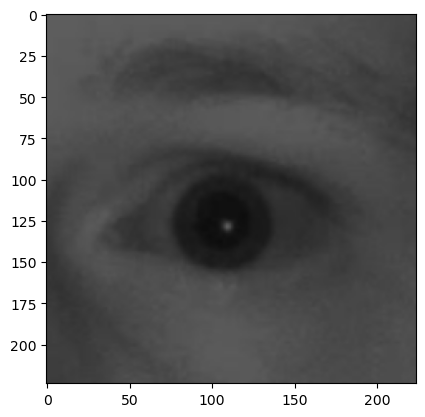

In [40]:
plt.imshow(new_array)

In [41]:
X_input = X_input/255.0

In [42]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


In [43]:
prediction

array([[8.894673e-28]], dtype=float32)

# Lets check unknown images

In [44]:
img = cv2.imread(r"C:\Users\shash\OneDrive\Documents\Sad_Women.png")

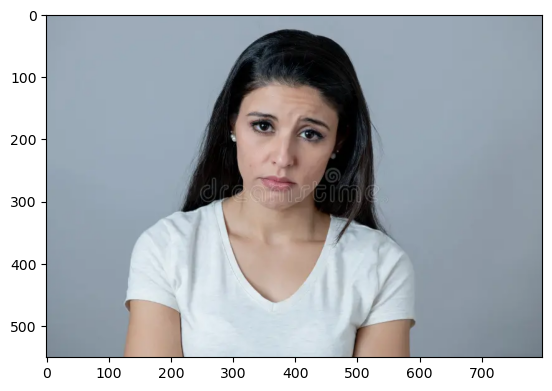

In [45]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [46]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [47]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [48]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [49]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [50]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)

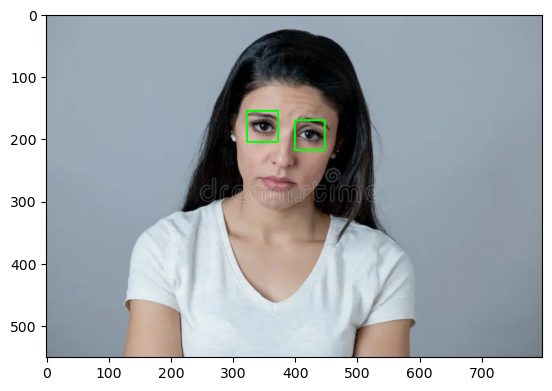

In [51]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# cropping the eye image

In [52]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   #print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x:w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

Image shape: (551, 798, 3)


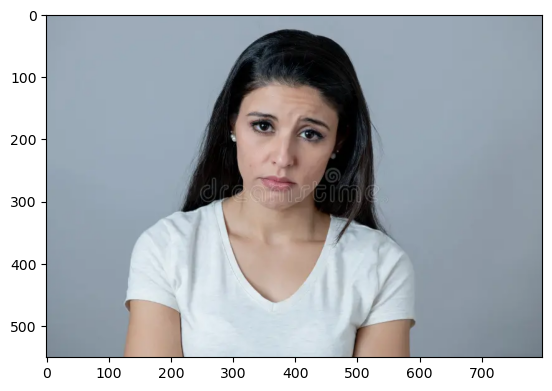

In [53]:
import cv2
import matplotlib.pyplot as plt


image_path = "C:/Users/shash/OneDrive/Documents/Sad_Women.png"  # Using forward slashes
eyes_roi = cv2.imread(image_path)


if eyes_roi is None:
    print("Error: Unable to load the image.")
else:
 
    print("Image shape:", eyes_roi.shape)

 
    if eyes_roi.size > 0:
       
        converted_image = cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB)

       
        plt.imshow(converted_image)
        plt.show()
    else:
        print("Error: The loaded image is empty.")


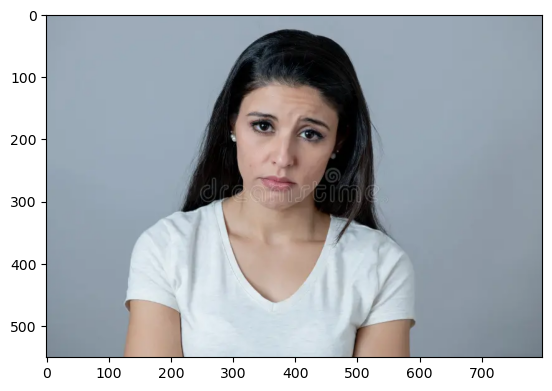

In [54]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

Image shape: (551, 798, 3)


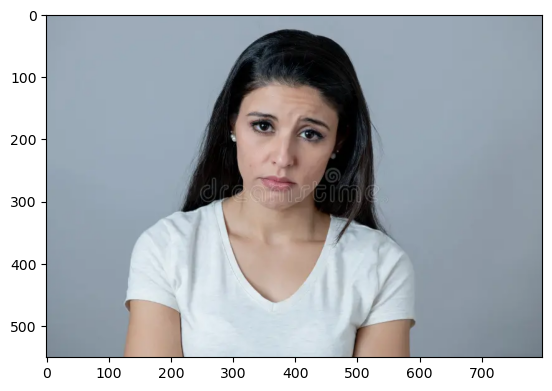

In [55]:
import cv2
import matplotlib.pyplot as plt


image_path = r"C:\Users\shash\OneDrive\Documents\Sad_Women.png"  # Using raw string literal
eyes_roi = cv2.imread(r"C:\Users\shash\OneDrive\Documents\Sad_Women.png")



if eyes_roi is None:
    print("Error: Unable to load the image.")
else:
    
    print("Image shape:", eyes_roi.shape)

   
    if eyes_roi.size > 0:
       
        converted_image = cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB)

      
        plt.imshow(converted_image)
        plt.show()
    else:
        print("Error: The loaded image is empty.")


In [56]:
eyess_roi.shape


NameError: name 'eyess_roi' is not defined

In [57]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0) ##need fourth dimension
final_image = final_image/255.0

In [58]:
final_image.shape

(1, 224, 224, 3)

In [59]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0.9998548]], dtype=float32)

In [7]:
import tensorflow as tf

# Load the pre-trained eye detection model
new_model = tf.keras.models.load_model(r"C:\Users\shash\OneDrive\Documents\Train_DataSet.h5")



In [1]:
import cv2
import numpy as np
import tensorflow as tf


new_model = tf.keras.models.load_model(r"C:\Users\shash\OneDrive\Documents\Train_DataSet.h5")

image_path = r"C:\Users\shash\OneDrive\Documents\Sad_Women.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  


resized_image = cv2.resize(image, (224, 224))
resized_image = resized_image / 255.0 


final_image = np.expand_dims(resized_image, axis=0)


Predictions = new_model.predict(final_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
import argparse
import time
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from imutils.video import FileVideoStream, VideoStream
from scipy.spatial import distance as dist
import pygame

# Initialize Pygame
pygame.init()
pygame.mixer.init()

# Load the alarm sound
pygame.mixer.music.load(r"C:\Users\shash\OneDrive\Documents\wake_up.mp3")

# Initialize the face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(r"C:\\Users\\shash\\Downloads\\archive (4)\\shape_predictor_68_face_landmarks.dat")

# Function to calculate the eye aspect ratio
def eye_aspect_ratio(eye):
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])
    C = dist.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

# Define the indices for the left and right eyes
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

# Set the EAR threshold and the number of consecutive frames for blink detection
EAR_THRESHOLD = 0.2
EAR_CONSEC_FRAMES = 3

# Initialize variables for blink detection and alarm
blink_counter = 0
ALARM_ON = False
ALARM_TRIGGER_TIME = 5 # Time in seconds to trigger the alarm

# Start capturing video from the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    rects = detector(gray, 0)

    for rect in rects:
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        leftEye = shape[lStart:lEnd]
        rightEye = shape[rStart:rEnd]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)

        ear = (leftEAR + rightEAR) / 2.0

        if ear < EAR_THRESHOLD:
            blink_counter += 1
            if blink_counter == 1: # Start the timer when blinking starts
                ALARM_TIMER = time.time()
            if blink_counter >= EAR_CONSEC_FRAMES:
                if not ALARM_ON and time.time() - ALARM_TIMER >= ALARM_TRIGGER_TIME:
                    ALARM_ON = True
                    pygame.mixer.music.play()
                    print("Alarm: Eyes Closed for 5 seconds!")
        else:
            blink_counter = 0
            ALARM_ON = False
            pygame.mixer.music.stop()
            print("Eyes Open")

    cv2.imshow('Eye Blink Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Eyes Open
Alarm: Eyes Closed for 5 seconds!
Eye

In [2]:
pip install dlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
  Rolling back uninstall of pip
  Moving to c:\users\shash\appdata\roaming\python\python311\scripts\pip.exe
   from C:\Users\shash\AppData\Local\Temp\pip-uninstall-ex11hn5z\pip.exe
  Moving to c:\users\shash\appdata\roaming\python\python311\scripts\pip3.11.exe
   from C:\Users\shash\AppData\Local\Temp\pip-uninstall-ex11hn5z\pip3.11.exe
  Moving to c:\users\shash\appdata\roaming\python\python311\scripts\pip3.exe
   from C:\Users\shash\AppData\Local\Temp\pip-uninstall-ex11hn5z\pip3.exe
  Moving to c:\users\shash\appdata\roaming\python\python311\site-packages\pip-23.0.1.dist-info\
   from C:\Users\shash\AppData\Roaming\Python\Python311\site-packages\~ip-23.0.1.dist-info
  Moving to c:\users\shash\appdata\roaming\python\python311\site-packages\pip\
   from C:\Users\shash\AppData\Roaming\Python\Python

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\shash\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\shash\AppData\Roaming\Python\Python311\site-packages\pip\_internal\cli\req_command.py", line 247, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shash\AppData\Roaming\Python\Python311\site-packages\pip\_internal\commands\install.py", line 507, in run
    installed = install_given_reqs(
                ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shash\AppData\Roaming\Python\Python311\site-packages\pip\_internal\req\__init__.py", line 73, in install_given_reqs
    requirement.install(
  File "C:\Users\shash\AppData\Roaming\Python\Python311\site-packages\pip\_internal\req\req_install.py", line 796, in install
    install_wheel(
  File "C:\Users\shash\AppData\Roaming\Python\Python

In [8]:
pip install imutils


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
